In [70]:
# importing libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output
import numpy as np # mathematical essentials
import statsmodels.formula.api as smf # regression modeling
import sklearn.linear_model
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.preprocessing import StandardScaler     # standard scaler
# new packages
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer  
# new packages
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm
# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = './datasets/Apprentice_Chef_Dataset.xlsx'


# reading the file into Python
restaurant = pd.read_excel(io= file)

In [71]:
restaurant.head(n=3)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0


In [72]:
#IDENTIFYING MISSING VALUES WITHIN OUR DATASETS IN ORDER TO TREAT THEM BEFORE HEADING INTO MODELLING
restaurant.isnull().sum(axis = 0)

REVENUE                         0
CROSS_SELL_SUCCESS              0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    47
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
MOBILE_NUMBER                   0
CANCELLATIONS_BEFORE_NOON       0
CANCELLATIONS_AFTER_NOON        0
TASTES_AND_PREFERENCES          0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
EARLY_DELIVERIES                0
LATE_DELIVERIES                 0
PACKAGE_LOCKER                  0
REFRIGERATED_LOCKER             0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
MASTER_CLASSES_ATTENDED         0
MEDIAN_MEAL_RATING              0
AVG_CLICKS_PER_VISIT            0
TOTAL_PHOTOS_VIEWED             0
dtype: int64

In [73]:
# Imputation of missing values for categorical variable FAMILY_NAME where 'U' represents Unknown
fill = 'U'


# imputing 'FAMILY_NAME'
restaurant['FAMILY_NAME'] =restaurant['FAMILY_NAME'].fillna(fill)

In [74]:
restaurant.isnull().any().any()

False

In [75]:
restaurant.head(n=5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205


In [76]:
# STEP 1: splitting personal emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in restaurant.iterrows():
    
    # splitting email domain at '@'
    split_email = restaurant.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
email_df


,0,1
0,saathos,unitedhealth.com
1,alysanne.osgrey,ge.org
2,edwyd.fossoway,jnj.com
3,eleyna.westerling,ge.org
4,elyn.norridge,jnj.com
...,...,...
1941,obara.sand,yahoo.com
1942,quentyn.blackwood,yahoo.com
1943,rhonda.rowan,gmail.com
1944,turnip,yahoo.com


In [77]:
# STEP 2: concatenating with original DataFrame

# safety measure in case of multiple concatenations
restaurant = pd.read_excel(file)


# renaming column to concatenate
email_df.columns = ['0' , 'EMAIL_DOMAIN']



restaurant = pd.concat([restaurant, email_df['EMAIL_DOMAIN']],
                   axis = 1)


# printing value counts of personal_email_domain
restaurant.loc[: ,'EMAIL_DOMAIN'].value_counts()


gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
cocacola.com         28
merck.com            28
jnj.com              28
mcdonalds.com        28
apple.com            27
nike.com             27
ge.org               26
ibm.com              26
dupont.com           26
chevron.com          25
microsoft.com        25
exxon.com            24
travelers.com        24
unitedhealth.com     24
boeing.com           23
caterpillar.com      22
pg.com               22
mmm.com              22
verizon.com          22
walmart.com          21
disney.com           21
visa.com             20
pfizer.com           20
jpmorgan.com         19
unitedtech.com       18
goldmansacs.com      18
cisco.com            18
homedepot.com        17
intel.com            17
Name: EMAIL_DOMAIN, dtype: int64

In [78]:
#Setting Personal, Professional and Junk Emails
personal      = ['gmail.com',
                               'yahoo.com',
                               'protonmail.com']

professional = ['mmm.com',
                               'amex.com',
                               'apple.com',
                               'boeing.com',
                               'caterpillar.com',
                               'chevron.com',
                               'cisco.com',
                               'cocacola.com',
                               'disney.com',
                               'dupont.com',
                               'exxon.com',
                               'ge.org',
                               'goldmansacs.com',
                               'homedepot.com',
                               'ibm.com',
                               'intel.com',
                               'jnj.com',
                               'jpmorgan.com',
                               'mcdonalds.com',
                               'merck.com',
                               'microsoft.com',
                               'nike.com',
                               'pfizer.com',
                               'pg.com',
                               'travelers.com',
                               'unitedtech.com',
                               'unitedhealth.com',
                               'verizon.com',
                               'visa.com',
                               'walmart.com']

junk       = ['me.com',
                            'aol.com',
                            'hotmail.com',
                            'live.com',
                            'msn.com',
                            'passport.com']

# Populate the Email Type column by if else statements
for index, row in restaurant.iterrows():

    if restaurant.loc[index, 'EMAIL_DOMAIN'] in professional:
        restaurant.loc[index, 'EMAIL_TYPE'] = 'professional'
    elif restaurant.loc[index, 'EMAIL_DOMAIN'] in personal:
        restaurant.loc[index, 'EMAIL_TYPE'] = 'personal'
    elif restaurant.loc[index, 'EMAIL_DOMAIN'] in junk:
        restaurant.loc[index, 'EMAIL_TYPE'] = 'junk'
    elif restaurant.loc[index, 'EMAIL_DOMAIN'] not in professional or chefdata.loc[
            row, 'EMAIL'] not in personal or chefdata.loc[row, 'EMAIL'] not in junk:
        restaurant.loc[index, 'EMAIL_TYPE'] = 'unknown'
    else:
        print('We have a problem')

In [79]:
#Creating dummies
rest_dum=pd.get_dummies(restaurant['EMAIL_TYPE'])
restaurant= restaurant.join(rest_dum)

In [80]:
restaurant.head(n=5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,EMAIL_DOMAIN,EMAIL_TYPE,junk,personal,professional
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0,unitedhealth.com,professional,0,0,1
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170,ge.org,professional,0,0,1
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0,jnj.com,professional,0,0,1
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0,ge.org,professional,0,0,1
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205,jnj.com,professional,0,0,1


In [81]:
##Splitting the name and counting the number of names


# placeholder list
name_lst = []

# looping over each email address
for index, col in restaurant.iterrows():
    
    # splitting NAMES
    split_name = restaurant.loc[index, 'NAME'].split(sep = ' ')
    num_name = len(split_name)
    # appending placeholder_lst with the results
    name_lst.append(num_name)
    

# converting placeholder_lst into a DataFrame 
name_num_df = pd.DataFrame(name_lst)




In [82]:
#Concantenating full name to the chef datasets
#Create a column and renaming it

name_num_df.columns =['num']

#Looping the datasets to input correct data
for index, col in name_num_df.iterrows():
    
    #setting a conditional statement if name is more than 1
    if name_num_df.loc[index, 'num']>1:
        name_num_df.loc[index,'HAS_FULL_NAME']=1
        
    else :
        name_num_df.loc[index,'HAS_FULL_NAME']=0
        
#Dropping the num from the dataset
name_num_df = name_num_df.drop('num', axis=1)

#concatenating having a fullname with restaurant dataframe

restaurant = pd.concat([restaurant,name_num_df['HAS_FULL_NAME']],
                      axis = 1)

In [83]:
restaurant.head(n=5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,EMAIL_DOMAIN,EMAIL_TYPE,junk,personal,professional,HAS_FULL_NAME
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0,unitedhealth.com,professional,0,0,1,0.0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170,ge.org,professional,0,0,1,1.0
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0,jnj.com,professional,0,0,1,1.0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0,ge.org,professional,0,0,1,1.0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205,jnj.com,professional,0,0,1,1.0


In [84]:
# log transforming REVENUE and saving it to the dataset
restaurant['log_REVENUE'] = np.log10(restaurant['REVENUE'])

In [85]:

def log_trans (x):
    """ performs a log transformation after checking for zeros within in the column
    
    input
    x = str, column name that is supposed to be transformed
    """
    
    #check for null values and impute to 0.01 if existing
    for index, value in restaurant.iterrows():
    
        if restaurant.loc[index, x] == 0:
            restaurant.loc[index, x] = 0.01 #setting to 0.01
        
    
    # log transformation
    restaurant['log_' + x] = np.log10(restaurant[x])

In [86]:
log_trans (x='MEDIAN_MEAL_RATING')

In [87]:
log_trans (x='TOTAL_MEALS_ORDERED')

In [88]:
log_trans (x='CONTACTS_W_CUSTOMER_SERVICE')

In [89]:
log_trans (x='PRODUCT_CATEGORIES_VIEWED')

In [90]:
log_trans (x='AVG_PREP_VID_TIME')

In [91]:
log_trans (x='MASTER_CLASSES_ATTENDED')

In [92]:
restaurant.head(n=5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,EMAIL_DOMAIN,EMAIL_TYPE,junk,personal,professional,HAS_FULL_NAME,log_REVENUE,log_MEDIAN_MEAL_RATING,log_TOTAL_MEALS_ORDERED,log_CONTACTS_W_CUSTOMER_SERVICE,log_PRODUCT_CATEGORIES_VIEWED,log_AVG_PREP_VID_TIME,log_MASTER_CLASSES_ATTENDED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0.01,1,17,0,unitedhealth.com,professional,0,0,1,0.0,2.594393,0.000000,1.146128,1.079181,1.00000,1.523746,-2.0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0.01,3,13,170,ge.org,professional,0,0,1,1.0,3.135133,0.477121,1.939519,0.903090,0.90309,1.928396,-2.0
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0.01,2,16,0,jnj.com,professional,0,0,1,1.0,2.903090,0.301030,1.176091,1.041393,0.69897,1.799341,-2.0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0.01,2,14,0,ge.org,professional,0,0,1,1.0,2.778151,0.301030,1.113943,1.041393,0.69897,1.641474,-2.0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1.00,3,12,205,jnj.com,professional,0,0,1,1.0,3.173186,0.477121,1.672098,0.778151,1.00000,1.928396,0.0


In [93]:
#With total photos viewed being the variable affected by the most amount of zeroes we now
# count the number of zeroes
photos_zeroes    = len(restaurant['TOTAL_PHOTOS_VIEWED'][restaurant['TOTAL_PHOTOS_VIEWED'] == 0])
meals_zeroes    = len(restaurant['TOTAL_MEALS_ORDERED'][restaurant['TOTAL_MEALS_ORDERED'] == 0])
weekly_zeroes    = len(restaurant['WEEKLY_PLAN'][restaurant['WEEKLY_PLAN'] == 0])
order_zeroes    = len(restaurant['LARGEST_ORDER_SIZE'][restaurant['LARGEST_ORDER_SIZE'] == 0])
clicks_zeroes    = len(restaurant['AVG_CLICKS_PER_VISIT'][restaurant['AVG_CLICKS_PER_VISIT'] == 0])
# printing a table of the results
print(f"""
                 No\t\tYes
               ---------------------
Total Photos             | {photos_zeroes }\t\t{len(restaurant) - photos_zeroes}
Total Meals              | {meals_zeroes }\t\t{len(restaurant) - meals_zeroes}
Total Week               | {weekly_zeroes }\t\t{len(restaurant) - weekly_zeroes}
Total Order               | {order_zeroes }\t\t{len(restaurant) - order_zeroes}
Total Clicks               | {clicks_zeroes}\t\t{len(restaurant) - clicks_zeroes}
""")


                 No		Yes
               ---------------------
Total Photos             | 1140		806
Total Meals              | 0		1946
Total Week               | 468		1478
Total Order               | 0		1946
Total Clicks               | 0		1946



In [94]:
#Engineering flag features for the TOTAL PHOTOS VIEWED variable which has at least 100 observations in both 'Yes' and 'No'
#column
restaurant['has_Photos']      = 0
restaurant['has_Meals']       = 0
restaurant['has_Week']        = 0
restaurant['has_Order']        = 0
restaurant['has_Clicks']        = 0

for index, value in restaurant.iterrows():
    if restaurant.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0:
        restaurant.loc[index, 'has_Photos'] = 1
        
#MEALS ORDERED
    if restaurant.loc[index, 'TOTAL_MEALS_ORDERED'] > 20:
        restaurant.loc[index, 'has_Meals'] = 1
   #weekly plans
    if restaurant.loc[index, 'WEEKLY_PLAN'] > 0:
        restaurant.loc[index, 'has_Week'] = 1
        
     #order plans
    if restaurant.loc[index, 'LARGEST_ORDER_SIZE'] > 4:
        restaurant.loc[index, 'has_Order'] = 1
        
     #clicks plans
    if restaurant.loc[index, 'AVG_CLICKS_PER_VISIT'] > 10:
        restaurant.loc[index, 'has_Clicks'] = 1
        
        

In [95]:
#Checking results
restaurant[['has_Photos','has_Meals','has_Week','has_Order','has_Clicks']].head()

,has_Photos,has_Meals,has_Week,has_Order,has_Clicks
0,0,0,0,0,1
1,1,1,1,0,1
2,0,0,1,0,1
3,0,0,1,0,1
4,1,1,1,0,1


In [96]:
restaurant.head(n=5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,EMAIL_DOMAIN,EMAIL_TYPE,junk,personal,professional,HAS_FULL_NAME,log_REVENUE,log_MEDIAN_MEAL_RATING,log_TOTAL_MEALS_ORDERED,log_CONTACTS_W_CUSTOMER_SERVICE,log_PRODUCT_CATEGORIES_VIEWED,log_AVG_PREP_VID_TIME,log_MASTER_CLASSES_ATTENDED,has_Photos,has_Meals,has_Week,has_Order,has_Clicks
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0.01,1,17,0,unitedhealth.com,professional,0,0,1,0.0,2.594393,0.000000,1.146128,1.079181,1.00000,1.523746,-2.0,0,0,0,0,1
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0.01,3,13,170,ge.org,professional,0,0,1,1.0,3.135133,0.477121,1.939519,0.903090,0.90309,1.928396,-2.0,1,1,1,0,1
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0.01,2,16,0,jnj.com,professional,0,0,1,1.0,2.903090,0.301030,1.176091,1.041393,0.69897,1.799341,-2.0,0,0,1,0,1
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0.01,2,14,0,ge.org,professional,0,0,1,1.0,2.778151,0.301030,1.113943,1.041393,0.69897,1.641474,-2.0,0,0,1,0,1
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1.00,3,12,205,jnj.com,professional,0,0,1,1.0,3.173186,0.477121,1.672098,0.778151,1.00000,1.928396,0.0,1,1,1,0,1


In [97]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(X_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
X_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the X data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(X_data)
        X_scaled           = scaler.transform(X_data)
        X_scaled_df        = pd.DataFrame(X_scaled)
        X_data             = X_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [98]:
# creating a (Pearson) correlation matrix
df_corr = restaurant.corr().round(2)


# printing (Pearson) correlations with SalePrice
print(df_corr.loc['CROSS_SELL_SUCCESS'].sort_values(ascending = False))

CROSS_SELL_SUCCESS                 1.00
HAS_FULL_NAME                      0.24
professional                       0.19
CANCELLATIONS_BEFORE_NOON          0.16
MOBILE_NUMBER                      0.10
TASTES_AND_PREFERENCES             0.08
REFRIGERATED_LOCKER                0.07
log_MASTER_CLASSES_ATTENDED        0.05
log_CONTACTS_W_CUSTOMER_SERVICE    0.05
CONTACTS_W_CUSTOMER_SERVICE        0.04
personal                           0.04
MASTER_CLASSES_ATTENDED            0.04
PACKAGE_LOCKER                     0.04
PC_LOGINS                          0.04
has_Order                          0.03
log_AVG_PREP_VID_TIME              0.03
AVG_PREP_VID_TIME                  0.03
MEDIAN_MEAL_RATING                 0.03
log_MEDIAN_MEAL_RATING             0.03
EARLY_DELIVERIES                   0.02
LARGEST_ORDER_SIZE                 0.02
log_TOTAL_MEALS_ORDERED            0.02
TOTAL_PHOTOS_VIEWED                0.01
log_REVENUE                        0.01
LATE_DELIVERIES                    0.01


In [99]:
# dropping Revenue, Name, Familyname  from the explanatory variable set
restaurant_data = restaurant.drop(['CROSS_SELL_SUCCESS','EMAIL',
                                                'log_REVENUE','NAME','FIRST_NAME','FAMILY_NAME'
                                                   ], axis = 1)


# preparing response variable data
restaurant_target = restaurant.loc[ : , 'CROSS_SELL_SUCCESS']
log_restaurant_target = restaurant.loc[:,'log_REVENUE']


In [100]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            restaurant_data,
            restaurant_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = restaurant_target)


# merging training data for statsmodels
restaurant_train = pd.concat([x_train, y_train], axis = 1)

In [101]:
for val in restaurant_data:
    print(f" {val} + ")

 REVENUE + 
 TOTAL_MEALS_ORDERED + 
 UNIQUE_MEALS_PURCH + 
 CONTACTS_W_CUSTOMER_SERVICE + 
 PRODUCT_CATEGORIES_VIEWED + 
 AVG_TIME_PER_SITE_VISIT + 
 MOBILE_NUMBER + 
 CANCELLATIONS_BEFORE_NOON + 
 CANCELLATIONS_AFTER_NOON + 
 TASTES_AND_PREFERENCES + 
 PC_LOGINS + 
 MOBILE_LOGINS + 
 WEEKLY_PLAN + 
 EARLY_DELIVERIES + 
 LATE_DELIVERIES + 
 PACKAGE_LOCKER + 
 REFRIGERATED_LOCKER + 
 AVG_PREP_VID_TIME + 
 LARGEST_ORDER_SIZE + 
 MASTER_CLASSES_ATTENDED + 
 MEDIAN_MEAL_RATING + 
 AVG_CLICKS_PER_VISIT + 
 TOTAL_PHOTOS_VIEWED + 
 EMAIL_DOMAIN + 
 EMAIL_TYPE + 
 junk + 
 personal + 
 professional + 
 HAS_FULL_NAME + 
 log_MEDIAN_MEAL_RATING + 
 log_TOTAL_MEALS_ORDERED + 
 log_CONTACTS_W_CUSTOMER_SERVICE + 
 log_PRODUCT_CATEGORIES_VIEWED + 
 log_AVG_PREP_VID_TIME + 
 log_MASTER_CLASSES_ATTENDED + 
 has_Photos + 
 has_Meals + 
 has_Week + 
 has_Order + 
 has_Clicks + 


In [102]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ CROSS_SELL_SUCCESS~TOTAL_MEALS_ORDERED + 
 REVENUE + 
 UNIQUE_MEALS_PURCH + 
 CONTACTS_W_CUSTOMER_SERVICE + 
 PRODUCT_CATEGORIES_VIEWED + 
 AVG_TIME_PER_SITE_VISIT + 
 MOBILE_NUMBER + 
 CANCELLATIONS_BEFORE_NOON + 
 CANCELLATIONS_AFTER_NOON + 
 TASTES_AND_PREFERENCES + 
 PC_LOGINS + 
 MOBILE_LOGINS + 
 WEEKLY_PLAN + 
 EARLY_DELIVERIES + 
 LATE_DELIVERIES + 
 PACKAGE_LOCKER + 
 REFRIGERATED_LOCKER + 
 AVG_PREP_VID_TIME + 
 LARGEST_ORDER_SIZE + 
 MASTER_CLASSES_ATTENDED + 
 MEDIAN_MEAL_RATING + 
 AVG_CLICKS_PER_VISIT + 
 TOTAL_PHOTOS_VIEWED +  
 junk + 
 personal + 
 professional + 
 HAS_FULL_NAME + 
 log_MEDIAN_MEAL_RATING + 
 log_TOTAL_MEALS_ORDERED + 
 log_CONTACTS_W_CUSTOMER_SERVICE + 
 log_PRODUCT_CATEGORIES_VIEWED + 
 log_AVG_PREP_VID_TIME + 
 log_MASTER_CLASSES_ATTENDED + 
 has_Photos + 
 has_Meals + 
 has_Week    
 """,
                                        data    = restaurant_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()

Optimization terminated successfully.
         Current function value: 0.514208
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1423
Method:                           MLE   Df Model:                           35
Date:                Tue, 16 Feb 2021   Pseudo R-squ.:                  0.1811
Time:                        12:07:58   Log-Likelihood:                -750.23
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 4.631e-50
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -2.5705   1.15e+07  -2.23e-07      1.000   -2.26e+07    2.26e+07
TOTAL_MEALS_ORDERED                -0.0102      0.004     -2.899      0.004      -0.017      -0.003
REVENUE                            -0.0002   9.65e-05     -2.194      0.028      -0.000   -2.26e-05
UNIQUE_MEALS_PURCH                 -0.0026      0.027     -0.095      0.924      -0.055       0.050
CONTACTS_W_CUSTOMER_SERVICE         0.0074      0.196      0.038      0.970      -0.376       0.391
PRODUCT_CATEGORIES_VIEWED          -0.0087      0.075     -0.117      0.907      -0.155       0.137
AVG_TIME_PER_SITE_VISIT         -5.966e-05      0.001     -0.058      0.954      -0.002       0.002
MOBILE_NUMBER                       0.9415      0.185      5.084      0.000       0.579       1.304
CANCELLATIONS_BEFORE_NOON           0.2980      0.048      6.155      0.000       0.203       0.393
CANCELLATIONS_AFTER_NOON           -0.2746      0.146     -1.878      0.060      -0.561       0.012
TASTES_AND_PREFERENCES              0.3373      0.141      2.398      0.016       0.062       0.613
PC_LOGINS                           0.2332      0.112      2.083      0.037       0.014       0.452
MOBILE_LOGINS                      -0.1982      0.122     -1.622      0.105      -0.438       0.041
WEEKLY_PLAN                         0.0083      0.006      1.490      0.136      -0.003       0.019
EARLY_DELIVERIES                    0.0621      0.029      2.163      0.031       0.006       0.118
LATE_DELIVERIES                     0.0210      0.024      0.891      0.373      -0.025       0.067
PACKAGE_LOCKER                      0.0361      0.153      0.237      0.813      -0.263       0.335
REFRIGERATED_LOCKER                 0.5679      0.246      2.310      0.021       0.086       1.050
AVG_PREP_VID_TIME                   0.0083      0.006      1.454      0.146      -0.003       0.020
LARGEST_ORDER_SIZE                 -0.0804      0.075     -1.077      0.282      -0.227       0.066
MASTER_CLASSES_ATTENDED            -0.2081      0.287     -0.726      0.468      -0.770       0.354
MEDIAN_MEAL_RATING                  0.0763      0.502      0.152      0.879      -0.908       1.061
AVG_CLICKS_PER_VISIT               -0.0191      0.055     -0.348      0.728      -0.127       0.089
TOTAL_PHOTOS_VIEWED                -0.0004      0.001     -0.714      0.475      -0.001       0.001
junk                               -2.0298   1.15e+07  -1.76e-07      1.000   -2.26e+07    2.26e+07
personal                           -0.5794   1.15e+07  -5.03e-08      1.000   -2.26e+07    2.26e+07
professional                        0.0388   1.15e+07   3.37e-09      1.000   -2.26e+07    2.26e+07
HAS_FULL_NAME                       1.2394      0.136      9.083      0.000       0.972       1.507
log_MEDIAN_MEAL_RATING              0.0376      2.313      0.016      0.987      -4.496       4.571
log_TOTAL_MEALS_ORDERED             2.455

In [103]:
# instantiating a logistic regression model object with significant p-values
logistic_full = smf.logit(formula = """ CROSS_SELL_SUCCESS~TOTAL_MEALS_ORDERED +   
 MOBILE_NUMBER +
 personal + 
 
 CANCELLATIONS_BEFORE_NOON + 
 TASTES_AND_PREFERENCES + 
 PC_LOGINS + 
 EARLY_DELIVERIES +  
 log_TOTAL_MEALS_ORDERED   
 """,
                                        data    = restaurant_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()

Optimization terminated successfully.
         Current function value: 0.601270
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1450
Method:                           MLE   Df Model:                            8
Date:                Tue, 16 Feb 2021   Pseudo R-squ.:                 0.04250
Time:                        12:07:58   Log-Likelihood:                -877.25
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 1.304e-13
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -2.8233      0.802     -3.522      0.000      -4.394      -1.252
TOTAL_MEALS_ORDERED          -0.0029      0.002     -1.317      0.188      -0.007       0.001
MOBILE_NUMBER                 0.7023      0.165      4.247      0.000       0.378       1.026
personal                      0.1807      0.117      1.547      0.122      -0.048       0.409
CANCELLATIONS_BEFORE_NOON     0.2617      0.044      5.890      0.000       0.175       0.349
TASTES_AND_PREFERENCES        0.3355      0.126      2.660      0.008       0.088       0.583
PC_LOGINS                     0.2032      0.100      2.031      0.042       0.007       0.399
EARLY_DELIVERIES              0.0546      0.026      2.130      0.033       0.004       0.105
log_TOTAL_MEALS_ORDERED       0.7604      0.387      1.966      0.049       0.002       1.519
=============================================================================================
"""

In [104]:
# explanatory sets from last session

# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'TASTES_AND_PREFERENCES','AVG_PREP_VID_TIME','personal',
                   'PC_LOGINS', 'EARLY_DELIVERIES','REFRIGERATED_LOCKER','log_MASTER_CLASSES_ATTENDED',
                  'log_CONTACTS_W_CUSTOMER_SERVICE','PACKAGE_LOCKER','log_MEDIAN_MEAL_RATING','HAS_FULL_NAME'],
 
    # significant variables only (set 1)
 'logit_sig'    : ['CANCELLATIONS_BEFORE_NOON','MOBILE_NUMBER','TASTES_AND_PREFERENCES','personal','professional',
                   'PC_LOGINS','REVENUE','AVG_CLICKS_PER_VISIT','HAS_FULL_NAME','PACKAGE_LOCKER','REFRIGERATED_LOCKER'],

  # significant variables only (set 2)
 'logit_sig_2'  : ['HAS_FULL_NAME','CANCELLATIONS_BEFORE_NOON', 'MOBILE_NUMBER'
                  ]   

}

In [105]:
# printing candidate variable sets
print(f"""
/--------------------------\\
|Explanatory Variable Sets |
\\--------------------------/

Full Model:
-----------
{candidate_dict['logit_full']}

First Significant p-value Model:
--------------------------------
{candidate_dict['logit_sig']}


Second Significant p-value Model:
---------------------------------
{candidate_dict['logit_sig_2']}
""")


/--------------------------\
|Explanatory Variable Sets |
\--------------------------/

Full Model:
-----------
['MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'TASTES_AND_PREFERENCES', 'AVG_PREP_VID_TIME', 'personal', 'PC_LOGINS', 'EARLY_DELIVERIES', 'REFRIGERATED_LOCKER', 'log_MASTER_CLASSES_ATTENDED', 'log_CONTACTS_W_CUSTOMER_SERVICE', 'PACKAGE_LOCKER', 'log_MEDIAN_MEAL_RATING', 'HAS_FULL_NAME']

First Significant p-value Model:
--------------------------------
['CANCELLATIONS_BEFORE_NOON', 'MOBILE_NUMBER', 'TASTES_AND_PREFERENCES', 'personal', 'professional', 'PC_LOGINS', 'REVENUE', 'AVG_CLICKS_PER_VISIT', 'HAS_FULL_NAME', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER']


Second Significant p-value Model:
---------------------------------
['HAS_FULL_NAME', 'CANCELLATIONS_BEFORE_NOON', 'MOBILE_NUMBER']



LOGISTIC REGRESSION MODEL

In [106]:
#Developing a logistic regression model using the most significant x-variables
# train/test split with the full model
restaurant_data   =  restaurant.loc[ : , candidate_dict['logit_sig']]
restaurant_target =  restaurant.loc[ : , 'CROSS_SELL_SUCCESS']


# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            restaurant_data,
            restaurant_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = restaurant_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))


# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4) # accuracy

Training ACCURACY: 0.7567
Testing  ACCURACY: 0.7639


In [107]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 68  88]
 [ 27 304]]


In [108]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 68
False Positives: 88
False Negatives: 27
True Positives : 304



In [109]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.6772


In [110]:
# zipping each feature name to its coefficient
logreg_model_values = zip(restaurant[candidate_dict['logit_sig']].columns,
                          logreg_fit.coef_.ravel().round(decimals = 2))


# setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)
    

# checking the results
for pair in logreg_model_lst:
    print(pair)

('intercept', -0.12)
('CANCELLATIONS_BEFORE_NOON', 0.27)
('MOBILE_NUMBER', 0.78)
('TASTES_AND_PREFERENCES', 0.33)
('personal', 1.26)
('professional', 1.66)
('PC_LOGINS', -0.06)
('REVENUE', -0.0)
('AVG_CLICKS_PER_VISIT', -0.13)
('HAS_FULL_NAME', 1.2)
('PACKAGE_LOCKER', 0.11)
('REFRIGERATED_LOCKER', 0.37)


In [111]:
# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic'],
           
    'AUC Score' : [logreg_auc_score],
    
    'Training Accuracy' : [logreg_train_score],
           
    'Testing Accuracy'  : [logreg_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)

# print model performance
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6772,0.7567,0.7639,"(68, 88, 27, 304)"


In [112]:
# libraries for classification trees
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from six import StringIO                             # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus 

In [113]:
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img

########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

CLASSIFICATION TREE MODEL

In [114]:
#Developing a model using the various Classification trees
# INSTANTIATING a classification tree object
tree_pruned = DecisionTreeClassifier(min_samples_leaf=25,
                    max_depth = 8,
                    random_state = 219)


# FITTING the training data
tree_pruned_fit = tree_pruned.fit(x_train, y_train)


# PREDICTING on new data
pruned_tree_pred = tree_pruned_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = tree_pruned_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = tree_pruned_fit.score(x_test, y_test).round(4) # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc

Training ACCURACY: 0.7587
Testing  ACCURACY: 0.7762
AUC Score        : 0.7167


In [115]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 86
False Positives: 70
False Negatives: 39
True Positives : 292



In [116]:
# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Pruned Tree',
                           'Training Accuracy' : pruned_tree_train_score,
                           'Testing Accuracy'  : pruned_tree_test_score,
                           'AUC Score'         : pruned_tree_auc_score,
                           'Confusion Matrix'  : (pruned_tree_tn,
                                                  pruned_tree_fp,
                                                  pruned_tree_fn,
                                                  pruned_tree_tp)},
                           ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6772,0.7567,0.7639,"(68, 88, 27, 304)"
1,Pruned Tree,0.7167,0.7587,0.7762,"(86, 70, 39, 292)"


<ipython-input-113-0c71b2e3d4a7>:63: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


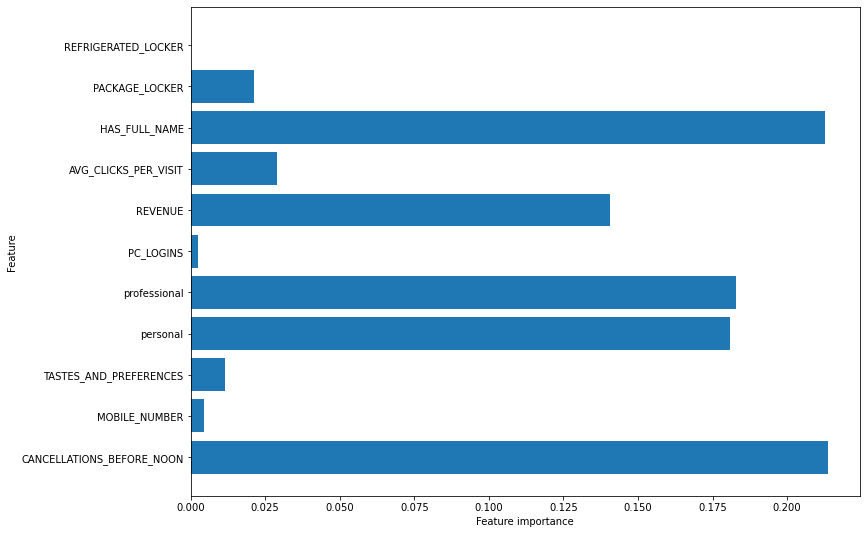

In [117]:
# plotting feature importance
plot_feature_importances(tree_pruned_fit,
                         train  = x_train,
                         export = False)

HYPERPARAMETER TUNING WITH THE SELECTED MODELS



In [118]:

########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800, export = False):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    export     : bool, defalut False
        whether or not to export the tree as a .png file
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width,
                unconfined = True)


    return img

In [119]:
# INSTANTIATING a logistic regression model with default values
lr_default = LogisticRegression(solver = 'lbfgs',
                                C = 1.0,
                                warm_start = False,
                                random_state = 219)

In [120]:
# FITTING the training data
lr_default_fit = lr_default.fit(x_train, y_train)


# PREDICTING based on the testing set
lr_default_pred = lr_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', lr_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', lr_default_fit.score(x_test, y_test).round(4))


# SCORING with AUC
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_default_pred).round(4))


# saving scoring data for future use
logreg_train_score = lr_default_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = lr_default_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC score
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = lr_default_pred).round(4)

Training ACCURACY: 0.7567
Testing  ACCURACY: 0.7639
AUC Score        : 0.6772


In [121]:
#Hyperparameter tuning on classification trees
# declaring a hyperparameter space
criterion_space = ['gini', 'entropy']
splitter_space  = ['best', 'random']
depth_space     = pd.np.arange(1, 25, 1)
leaf_space      = pd.np.arange(1, 100, 1)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_space,
              'splitter'         : splitter_space,
              'max_depth'        : depth_space,
              'min_samples_leaf' : leaf_space}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 1000,
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(restaurant_data, restaurant_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))


<ipython-input-121-deaaa63c6ea0>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  depth_space     = pd.np.arange(1, 25, 1)
<ipython-input-121-deaaa63c6ea0>:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  leaf_space      = pd.np.arange(1, 100, 1)


Tuned Parameters  : {'splitter': 'best', 'min_samples_leaf': 17, 'max_depth': 4, 'criterion': 'entropy'}
Tuned Training AUC: 0.6894


In [122]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = tuned_tree_cv.best_estimator_


# FIT step is not needed


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = tree_tuned_pred).round(4) # au


Training ACCURACY: 0.7546
Testing  ACCURACY: 0.7803
AUC Score        : 0.713


In [123]:
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 82
False Positives: 74
False Negatives: 33
True Positives : 298



BUILDING A RANDOM FOREST TREE MODEL

In [124]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [125]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 1.0
Testing  ACCURACY: 0.77
AUC Score        : 0.7003


In [126]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# declaring a hyperparameter space
estimator_space  = pd.np.arange(50, 250, 100)
leaf_space       = pd.np.arange(1, 5, 2)
criterion_space  = ['gini', 'entropy']
bootstrap_space  = [True, False]
warm_start_space = [True, False]


# creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_space,
              'min_samples_leaf' : leaf_space,
              'criterion'        : criterion_space,
              'bootstrap'        : bootstrap_space,
              'warm_start'       : warm_start_space}


# INSTANTIATING the model object without hyperparameters
forest_grid = RandomForestClassifier(random_state = 219)


# GridSearchCV object
forest_cv = RandomizedSearchCV(estimator           = forest_grid,
                               param_distributions = param_grid,
                               cv         = 3,
                               n_iter     = 10,
                               scoring    = make_scorer(roc_auc_score,
                                            needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
forest_cv.fit(restaurant_data, restaurant_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", forest_cv.best_params_)
print("Tuned Training AUC:", forest_cv.best_score_.round(4))

<ipython-input-126-fc76fcc375d9>:10: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  estimator_space  = pd.np.arange(50, 250, 100)
<ipython-input-126-fc76fcc375d9>:11: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  leaf_space       = pd.np.arange(1, 5, 2)


Tuned Parameters  : {'warm_start': True, 'n_estimators': 150, 'min_samples_leaf': 3, 'criterion': 'gini', 'bootstrap': True}
Tuned Training AUC: 0.6689


In [127]:
# best estimators based on RandomizedSearchCV
forest_cv.best_estimator_

RandomForestClassifier(min_samples_leaf=3, n_estimators=150, random_state=219,
                       warm_start=True)

In [128]:
# building a model based on hyperparameter tuning results

# INSTANTIATING with best_estimator
forest_tuned = forest_cv.best_estimator_


# FIT step not needed


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned.predict(x_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 0.8472
Forest Tuned Testing  ACCURACY: 0.8542
Forest Tuned AUC Score        : 0.7877


<ipython-input-113-0c71b2e3d4a7>:63: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


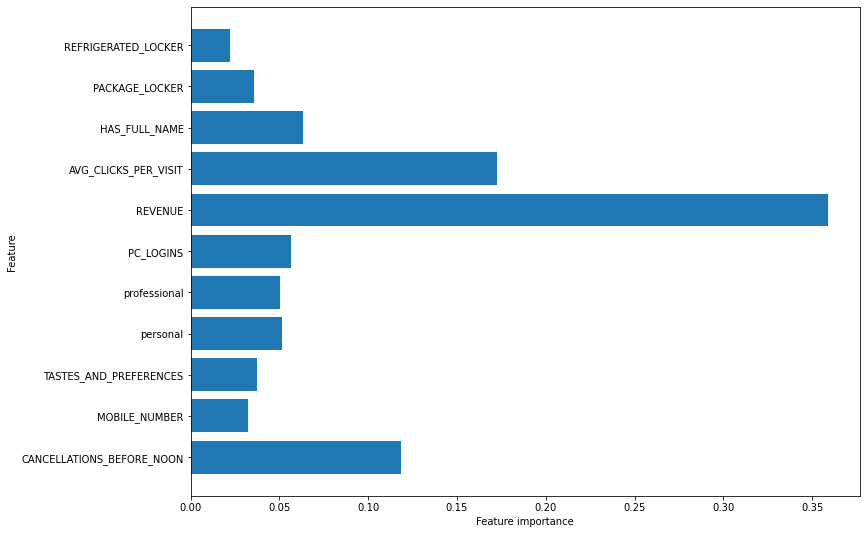

In [129]:
# plotting feature importances
plot_feature_importances(model = rf_default_fit,
                          train = x_train,
                          export= False)

In [130]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 94
False Positives: 62
False Negatives: 9
True Positives : 322



In [131]:
# declaring model performance objects
tuned_rf_train_acc = forest_tuned.score(x_train, y_train).round(4)
tuned_rf_test_acc  = forest_tuned.score(x_test, y_test).round(4)
tuned_rf_auc       = roc_auc_score(y_true  = y_test,
                                   y_score = forest_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Tuned Random Forest (Full)',
                           'Training Accuracy'  : tuned_rf_train_acc,
                           'Testing Accuracy'   : tuned_rf_test_acc,
                           'AUC Score'          : tuned_rf_auc,
                           'Confusion Matrix'   : (tuned_rf_tn,
                                                   tuned_rf_fp,
                                                   tuned_rf_fn,
                                                   tuned_rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6772,0.7567,0.7639,"(68, 88, 27, 304)"
1,Pruned Tree,0.7167,0.7587,0.7762,"(86, 70, 39, 292)"
2,Tuned Random Forest (Full),0.7877,0.8472,0.8542,"(94, 62, 9, 322)"


In [132]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.8005
Testing ACCURACY : 0.7474
AUC Score        : 0.6752


In [133]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 74
False Positives: 82
False Negatives: 41
True Positives : 290



In [141]:
# declaring a hyperparameter space
learn_space        = pd.np.arange(0.1, 3.0, 0.1)  #0.1, 3.0, 0.1)
estimator_space    = pd.np.arange(60,100, 10)    #60, 100, 10)
depth_space        = pd.np.arange(4, 9, 1)      #4, 9, 1)
#max_features_space = [True, False]


# creating a hyperparameter grid
param_grid = {'learning_rate' : learn_space,
              'max_depth'     : depth_space,
              'n_estimators'  : estimator_space,
              # 'warm_start'    : warm_start_space
             }


# INSTANTIATING the model object without hyperparameters
full_gbm_grid = GradientBoostingClassifier(random_state = 219)


# GridSearchCV object
full_gbm_cv = RandomizedSearchCV(estimator            = full_gbm_grid,
                                 param_distributions  = param_grid,
                                 cv                   = 3,
                                 n_iter               = 10,
                                 random_state         = 219,
                                 scoring              = make_scorer(roc_auc_score,
                                                       needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
full_gbm_cv.fit(restaurant_data, restaurant_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", full_gbm_cv.best_params_)
print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

<ipython-input-141-5ff556ef0958>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  learn_space        = pd.np.arange(0.1, 3.0, 0.1)  #0.1, 3.0, 0.1)
<ipython-input-141-5ff556ef0958>:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  estimator_space    = pd.np.arange(60,100, 10)    #60, 100, 10)
<ipython-input-141-5ff556ef0958>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  depth_space        = pd.np.arange(4, 9, 1)      #4, 9, 1)


Tuned Parameters  : {'n_estimators': 70, 'max_depth': 5, 'learning_rate': 0.2}
Tuned Training AUC: 0.6411


In [142]:
# INSTANTIATING with best_estimator
gbm_tuned = full_gbm_cv.best_estimator_



# FIT step is not needed


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

Training ACCURACY: 0.9109
Testing  ACCURACY: 0.9322
AUC Score        : 0.9027


In [136]:
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 128
False Positives: 28
False Negatives: 5
True Positives : 326



FINAL RESULTS

In [137]:
# declaring model performance objects
gbm_train_acc = gbm_tuned.score(x_train, y_train).round(4)
gbm_test_acc  = gbm_tuned.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = gbm_tuned_pred).round(4)




# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned GBM (final)',
                          'Training Accuracy'  : gbm_train_acc,
                          'Testing Accuracy'   : gbm_test_acc,
                          'AUC Score'          : gbm_auc,
                          'Confusion Matrix'   : (gbm_tuned_tn,
                                                  gbm_tuned_fp,
                                                  gbm_tuned_fn,
                                                  gbm_tuned_tp)},
                          ignore_index = True)




# checking the results
model_performance


,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6772,0.7567,0.7639,"(68, 88, 27, 304)"
1,Pruned Tree,0.7167,0.7587,0.7762,"(86, 70, 39, 292)"
2,Tuned Random Forest (Full),0.7877,0.8472,0.8542,"(94, 62, 9, 322)"
3,Tuned GBM (final),0.9027,0.9109,0.9322,"(128, 28, 5, 326)"


In [138]:
# print model performance
print(f"""{model_performance}

My final model is TUNED GBM! """)

                   Model Name  AUC Score  Training Accuracy  Testing Accuracy   Confusion Matrix
0                    Logistic     0.6772             0.7567            0.7639  (68, 88, 27, 304)
1                 Pruned Tree     0.7167             0.7587            0.7762  (86, 70, 39, 292)
2  Tuned Random Forest (Full)     0.7877             0.8472            0.8542   (94, 62, 9, 322)
3           Tuned GBM (final)     0.9027             0.9109            0.9322  (128, 28, 5, 326)

My final model is TUNED GBM! 
